<a href="https://colab.research.google.com/github/AlHasSaN0ALi/Project-Phase-3---DSAI-305/blob/main/Model_LG_Alhassan_DASI_305_Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# **Load Data**

In [4]:
df = pd.read_csv("cl_data.csv")
df

,concave points_mean,concave points_worst,perimeter_worst,radius_worst,area_worst,concavity_mean,perimeter_mean,radius_mean,area_mean,concavity_worst,...,radius_se,texture_worst,concave points_se,texture_mean,smoothness_worst,symmetry_worst,radius_ratio,area_ratio,concavity_product,diagnosis
0,0.03323,0.09975,123.80,19.19,1150.0,0.032990,102.70,16.020,797.8,0.14590,...,0.3795,33.88,0.007591,23.24,0.11810,0.2948,1.197878,1.441464,0.001096,1
1,0.04781,0.12880,99.70,15.11,711.2,0.066640,87.46,13.540,566.3,0.23900,...,0.2699,19.26,0.013150,14.36,0.14400,0.2977,1.115953,1.255871,0.003186,0
2,0.03110,0.07283,96.09,14.50,630.5,0.045680,85.63,13.080,520.0,0.18900,...,0.1852,20.49,0.006490,15.71,0.13120,0.3184,1.108563,1.212500,0.001421,0
3,0.02076,0.06227,65.13,10.23,314.9,0.029560,60.34,9.504,273.9,0.08867,...,0.2773,15.66,0.014210,12.44,0.13240,0.2450,1.076389,1.149690,0.000614,0
4,0.02923,0.05013,84.46,13.30,545.9,0.025620,82.61,13.030,523.8,0.04833,...,0.1839,22.81,0.011640,18.42,0.09701,0.1987,1.020721,1.042192,0.000749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.02738,0.09127,69.57,10.84,357.6,0.059990,65.67,10.290,321.4,0.20000,...,0.2199,34.91,0.017210,27.61,0.13840,0.2226,1.053450,1.112632,0.001643,0
304,0.01116,0.02232,67.88,10.65,347.3,0.005025,64.73,10.160,311.7,0.01005,...,0.2441,22.88,0.007082,19.59,0.12650,0.2262,1.048228,1.114212,0.000056,0
305,0.00000,0.00000,66.50,10.49,330.6,0.000000,59.26,9.423,271.3,0.00000,...,0.5375,34.24,0.000000,27.88,0.10730,0.2475,1.113233,1.218577,0.000000,0
306,0.03736,0.11050,105.90,15.48,733.5,0.102900,96.39,14.590,657.1,0.36620,...,0.2254,27.27,0.016060,22.68,0.10260,0.2258,1.061001,1.116268,0.003844,0


# **Split Data and pre-training process**

In [2]:
data = pd.read_csv("cl_data.csv")
X = data.drop(columns=["diagnosis"])
y = data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [11]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_rf = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[75  0]
 [ 0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00         2

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [8]:
from sklearn.inspection import PartialDependenceDisplay

In [14]:
importances = lr_model.coef_[0]
feature_names = X.columns
top10_indices = importances.argsort()[::-1][:10]
top10_features = [feature_names[i] for i in top10_indices]

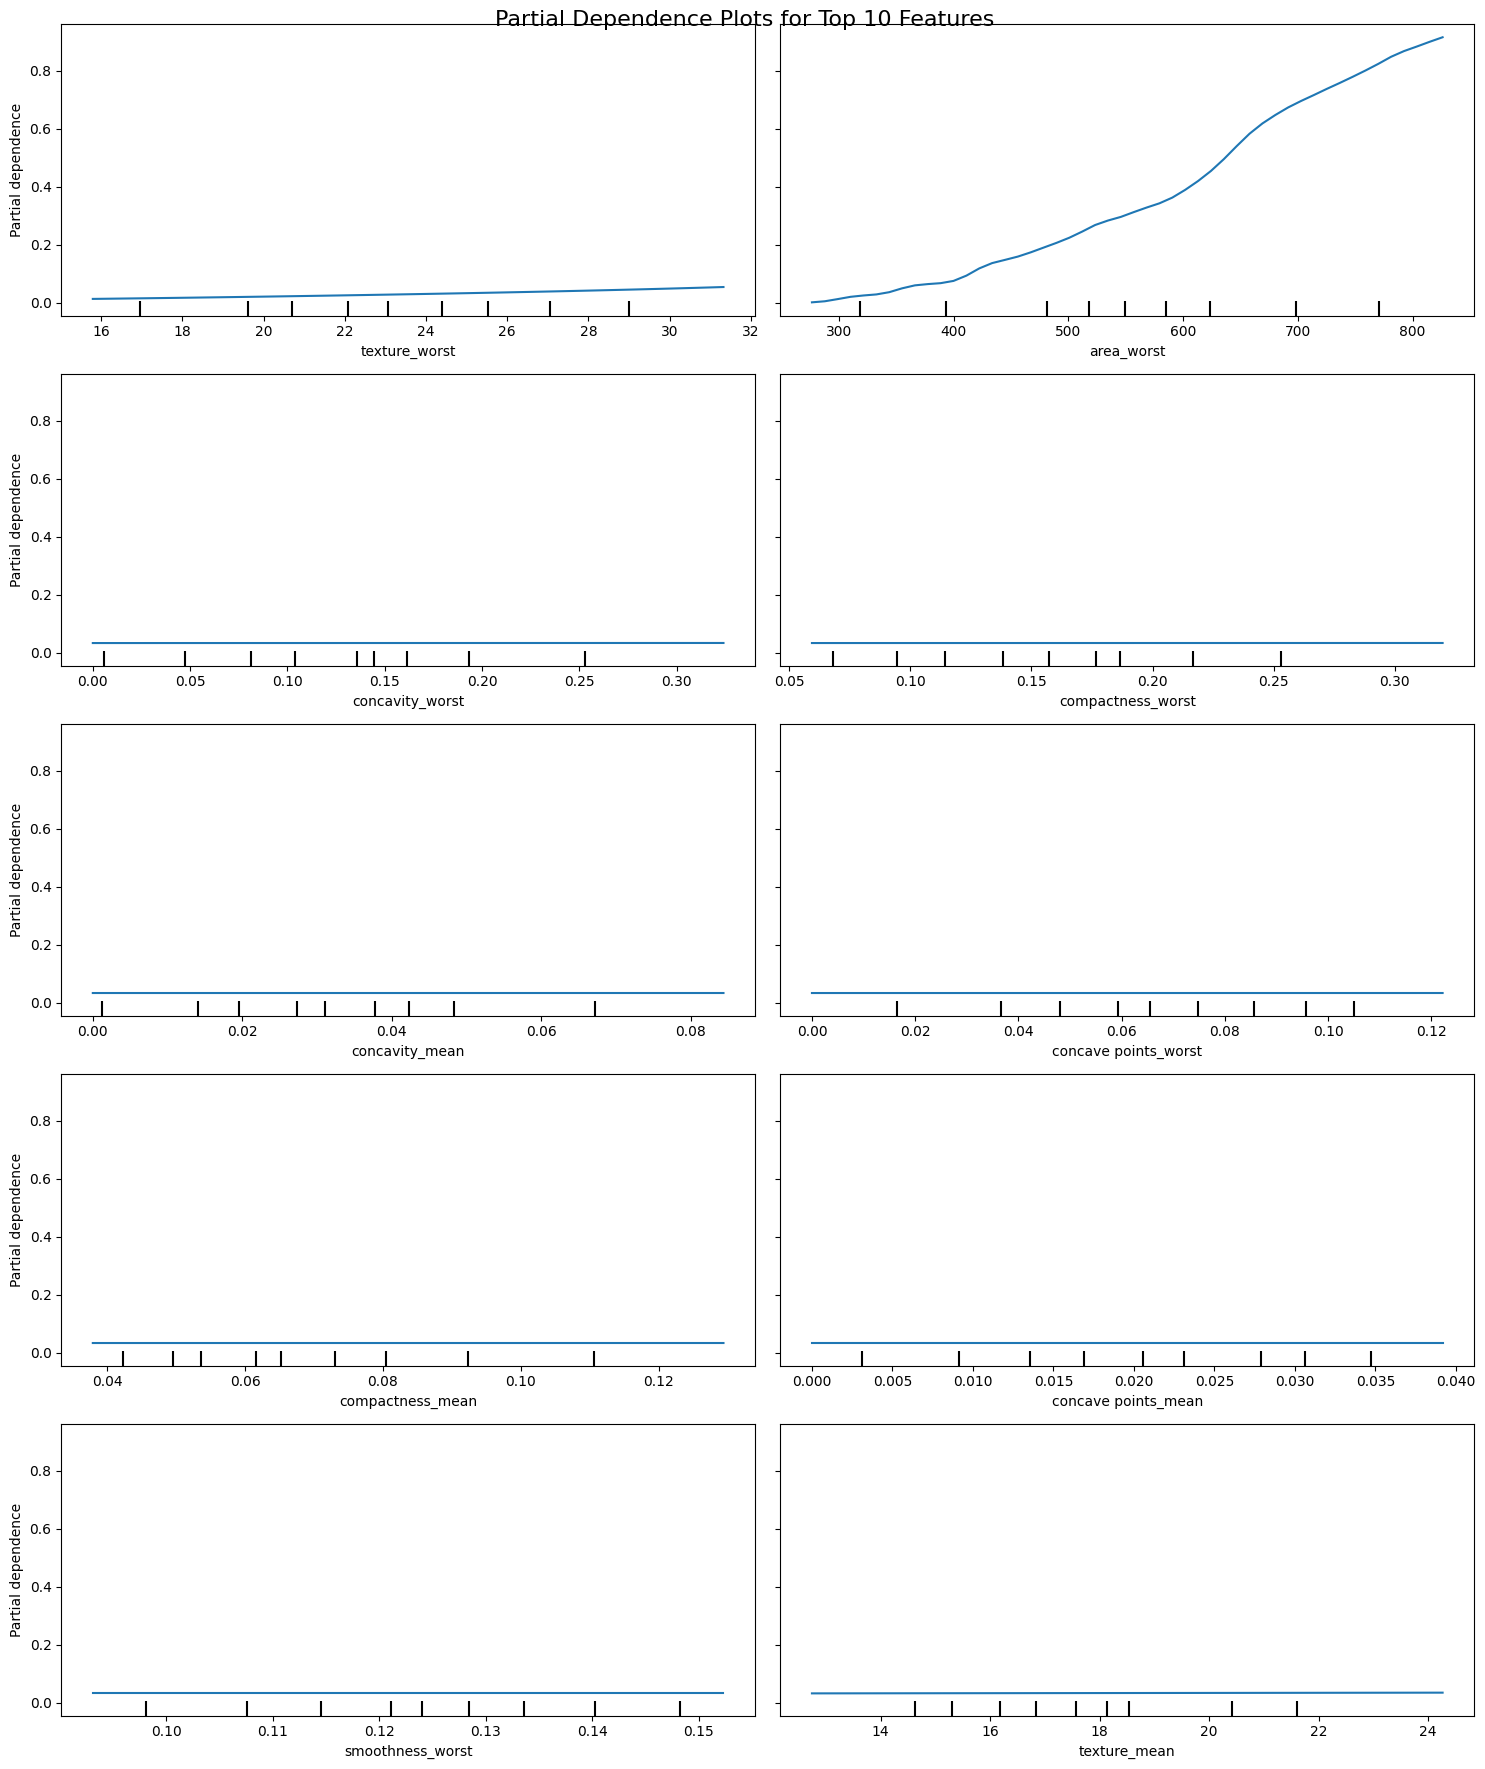

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
disp = PartialDependenceDisplay.from_estimator(
    lr_model,
    X_test,
    features=top10_features,
    feature_names=feature_names,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots for Top 10 Features", fontsize=16)
plt.tight_layout()
plt.show()

In [16]:
!pip install alibi

In [17]:
from alibi.explainers import ALE

In [18]:
!pip install ray[tune]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 MB 11.3 MB/s eta 0:00:00


In [19]:
!pip install "alibi[ray]"

# **ALE**

In [23]:
predict_fn = lambda x: lr_model.predict_proba(x)[:, 1]

In [24]:
importances = np.abs(lr_model.coef_[0])
top5_idx = np.argsort(importances)[::-1][:5]
top5_features = [X.columns[i] for i in top5_idx]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


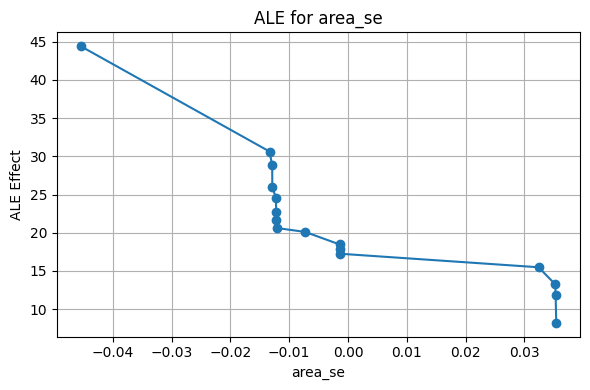

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


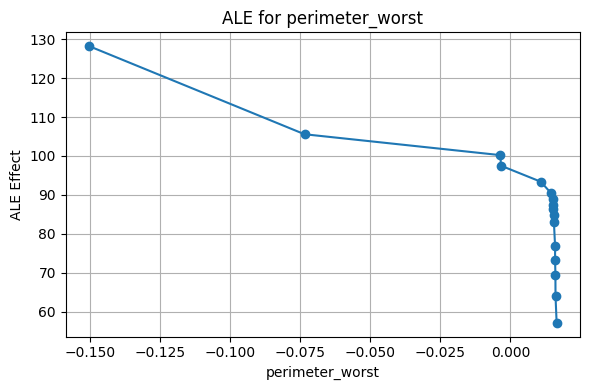

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


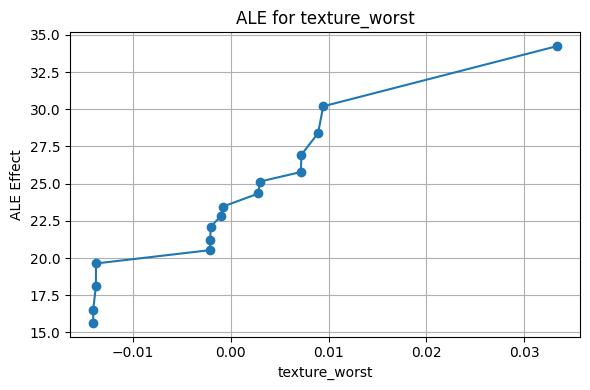

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


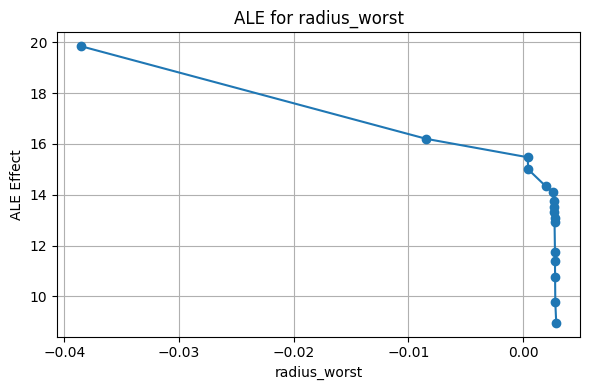

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


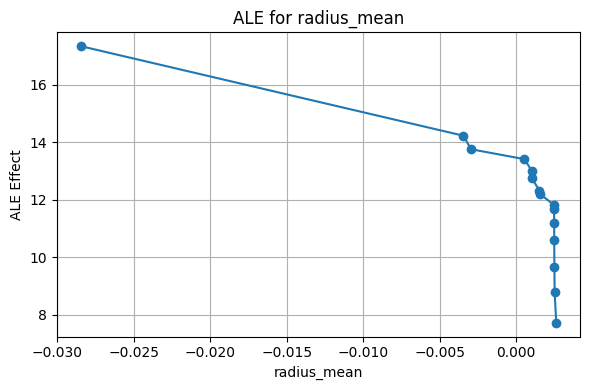

In [25]:
for feature in top5_features:
    feature_idx = list(X.columns).index(feature)

    ale_explainer = ALE(predict_fn, feature_names=list(X.columns), target_names=["Benign", "Malignant"])
    explanation = ale_explainer.explain(X_test.to_numpy(), features=[feature_idx])

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(explanation.ale_values[0], explanation.feature_values[0], marker='o')
    ax.set_xlabel(feature)
    ax.set_ylabel("ALE Effect")
    ax.set_title(f"ALE for {feature}")
    ax.grid(True)
    plt.tight_layout()
    plt.show()

In [26]:
ale_explainer = ALE(predictor=lr_model.predict_proba, feature_names=X.columns.tolist())

ale_exp = ale_explainer.explain(X_test.to_numpy())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

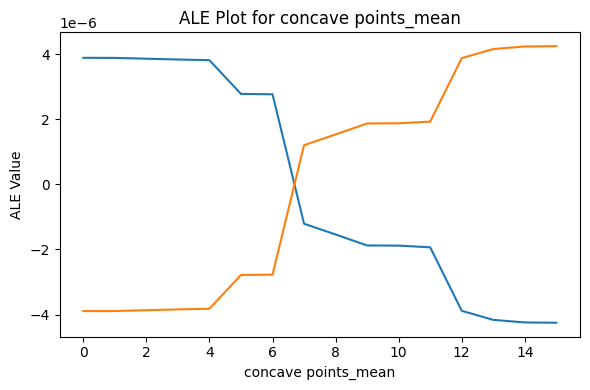

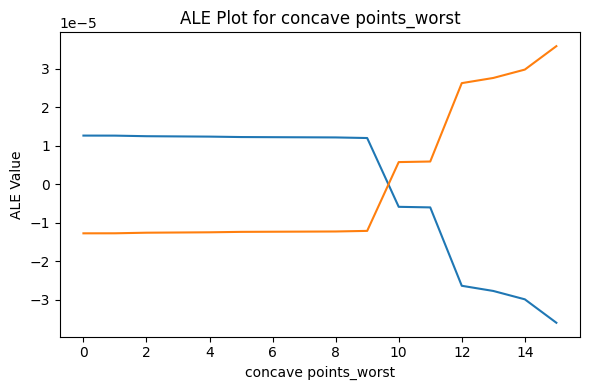

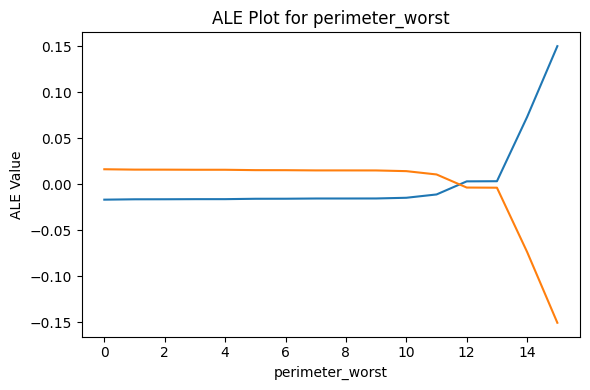

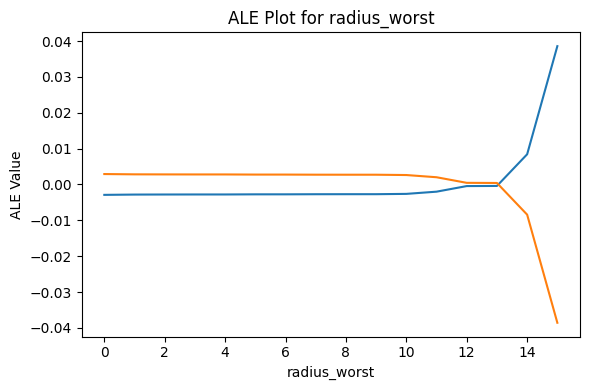

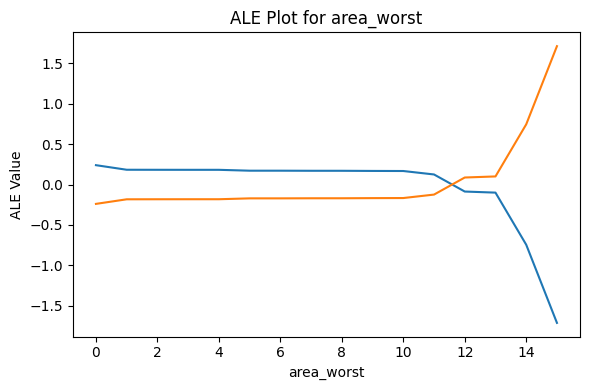

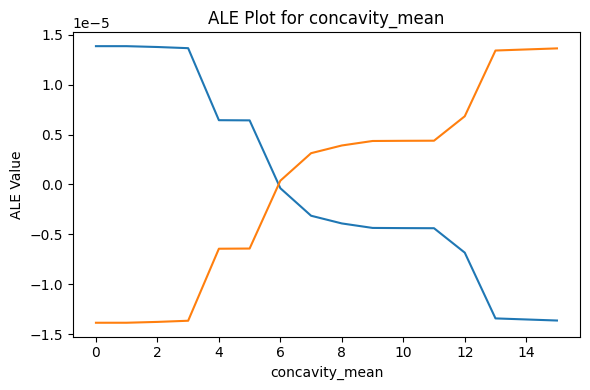

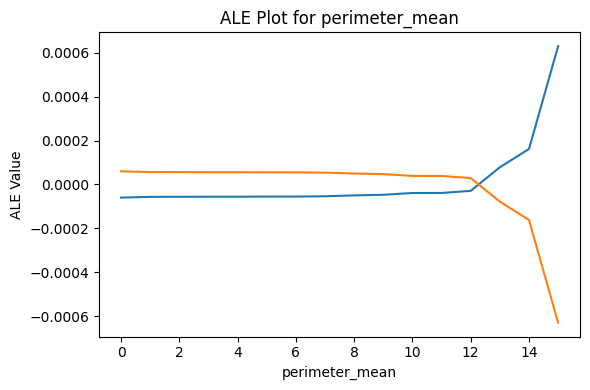

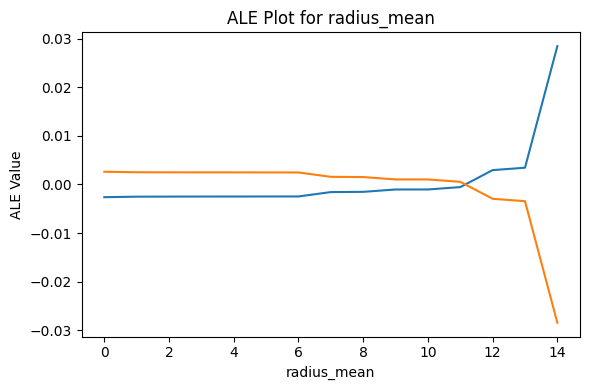

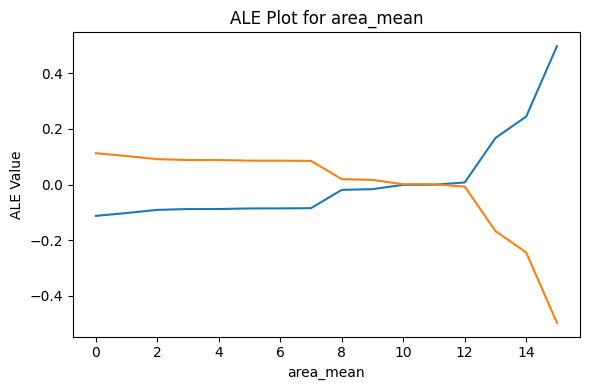

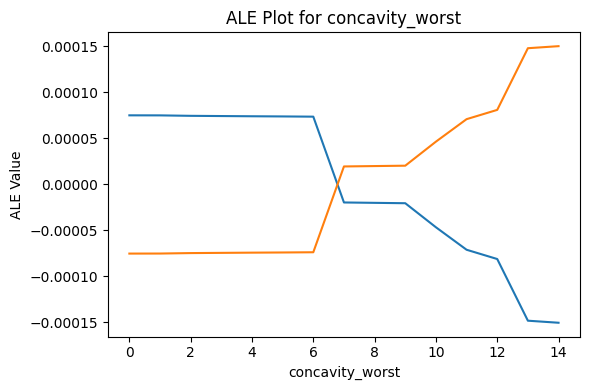

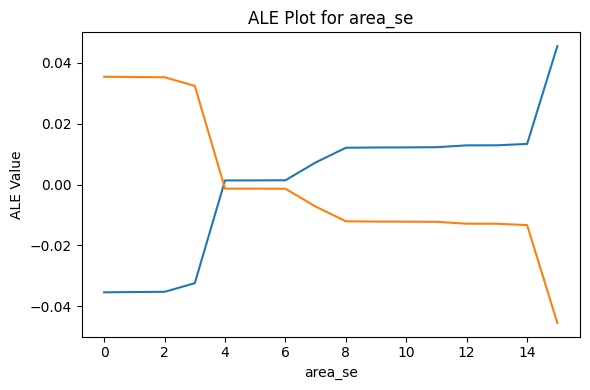

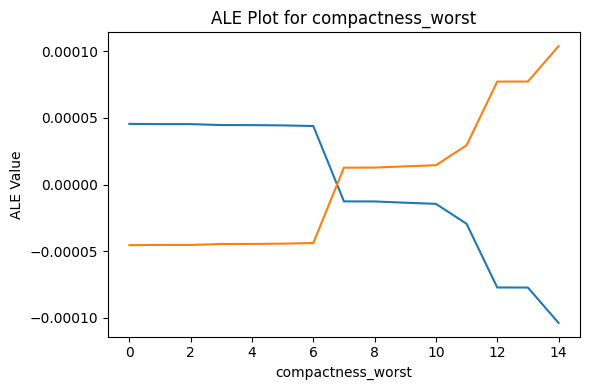

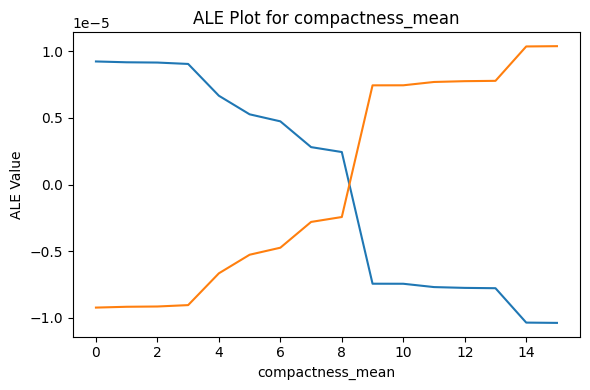

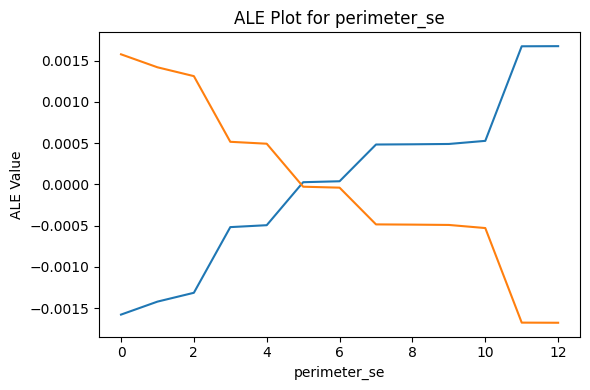

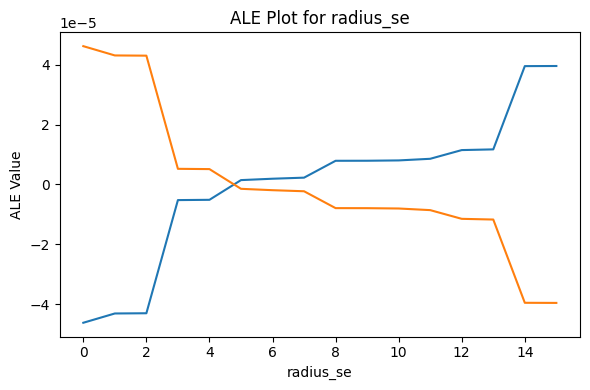

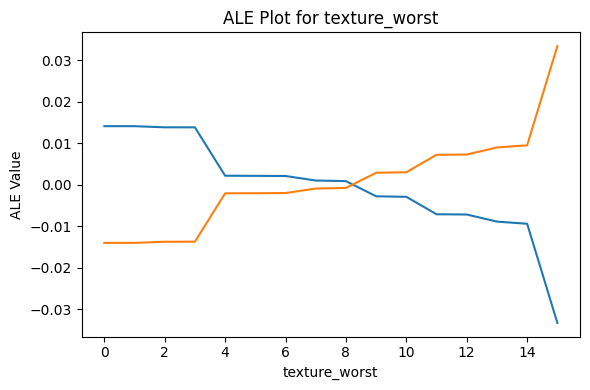

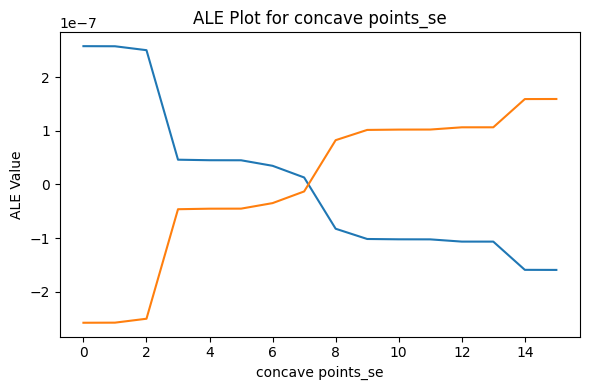

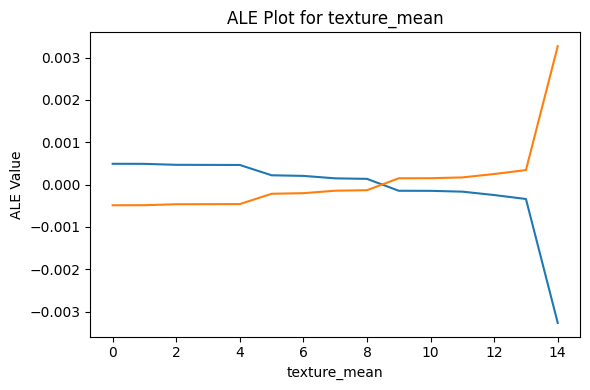

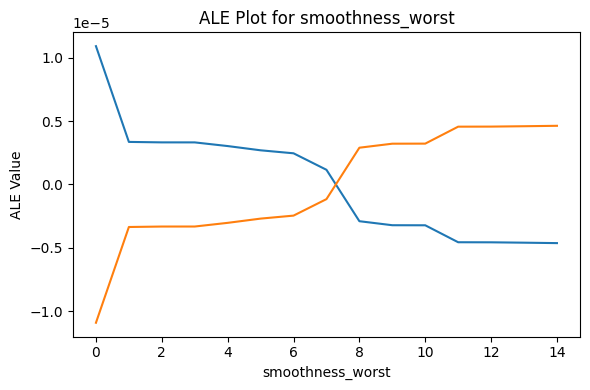

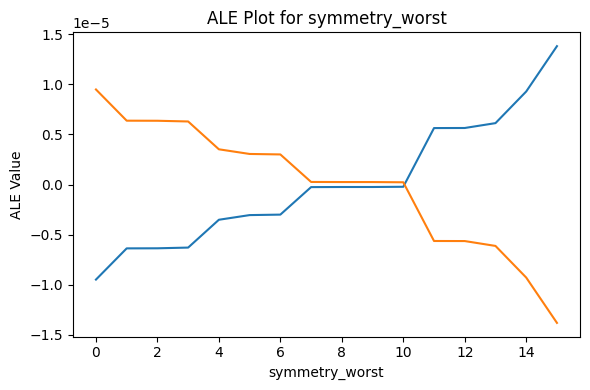

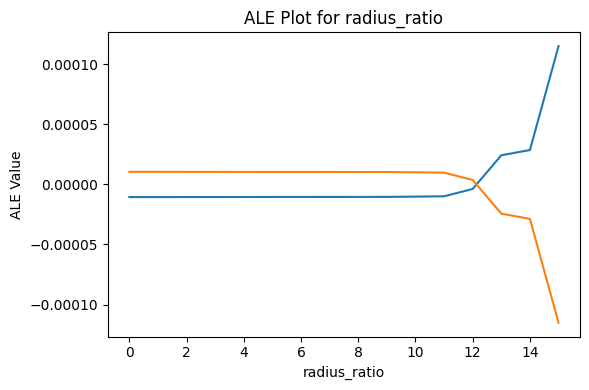

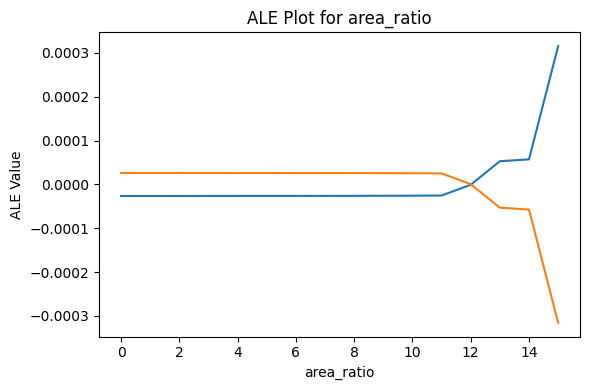

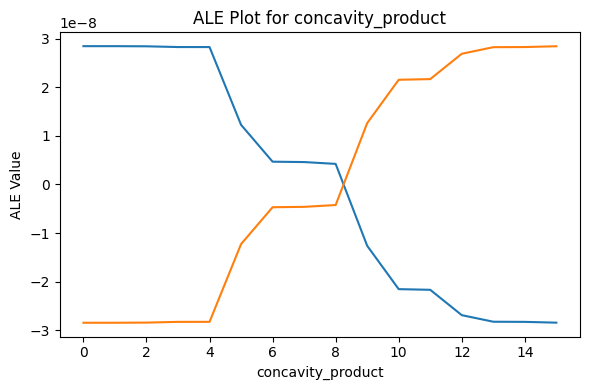

In [27]:
for idx, feature in enumerate(X.columns):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(ale_exp.ale_values[idx])
    ax.set_title(f"ALE Plot for {feature}")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("ALE Value")
    plt.tight_layout()
    plt.show()

# **eki5**

In [28]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.8 MB/s eta 0:00:00


In [29]:
import eli5
from eli5.sklearn import PermutationImportance

perm_rf = PermutationImportance(lr_model, random_state=42)
perm_rf.fit(X_train, y_train)

eli5.show_weights(perm_rf, feature_names=X.columns.tolist())


Weight,Feature
0.3810 ± 0.0197,area_worst
0.2762 ± 0.0265,area_mean
0.0485 ± 0.0149,perimeter_worst
0.0139 ± 0.0035,area_se
0.0026 ± 0.0069,texture_worst
0 ± 0.0000,symmetry_worst
0 ± 0.0000,concavity_mean
0 ± 0.0000,perimeter_mean
0 ± 0.0000,radius_mean
0 ± 0.0000,concavity_worst


# **ICE**

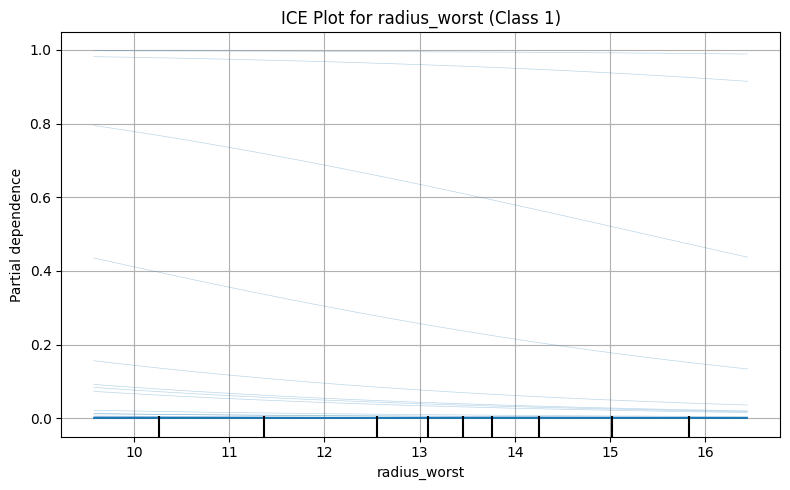

In [30]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


important_feature = top5_features[3]
feature_idx = list(X.columns).index(important_feature)


fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(
    lr_model,
    X_test,
    features=[feature_idx],
    feature_names=X.columns.tolist(),
    target=1,
    kind='individual',
    grid_resolution=50,
    ax=ax
)
plt.title(f"ICE Plot for {important_feature} (Class 1)")
plt.grid(True)
plt.tight_layout()
plt.show()

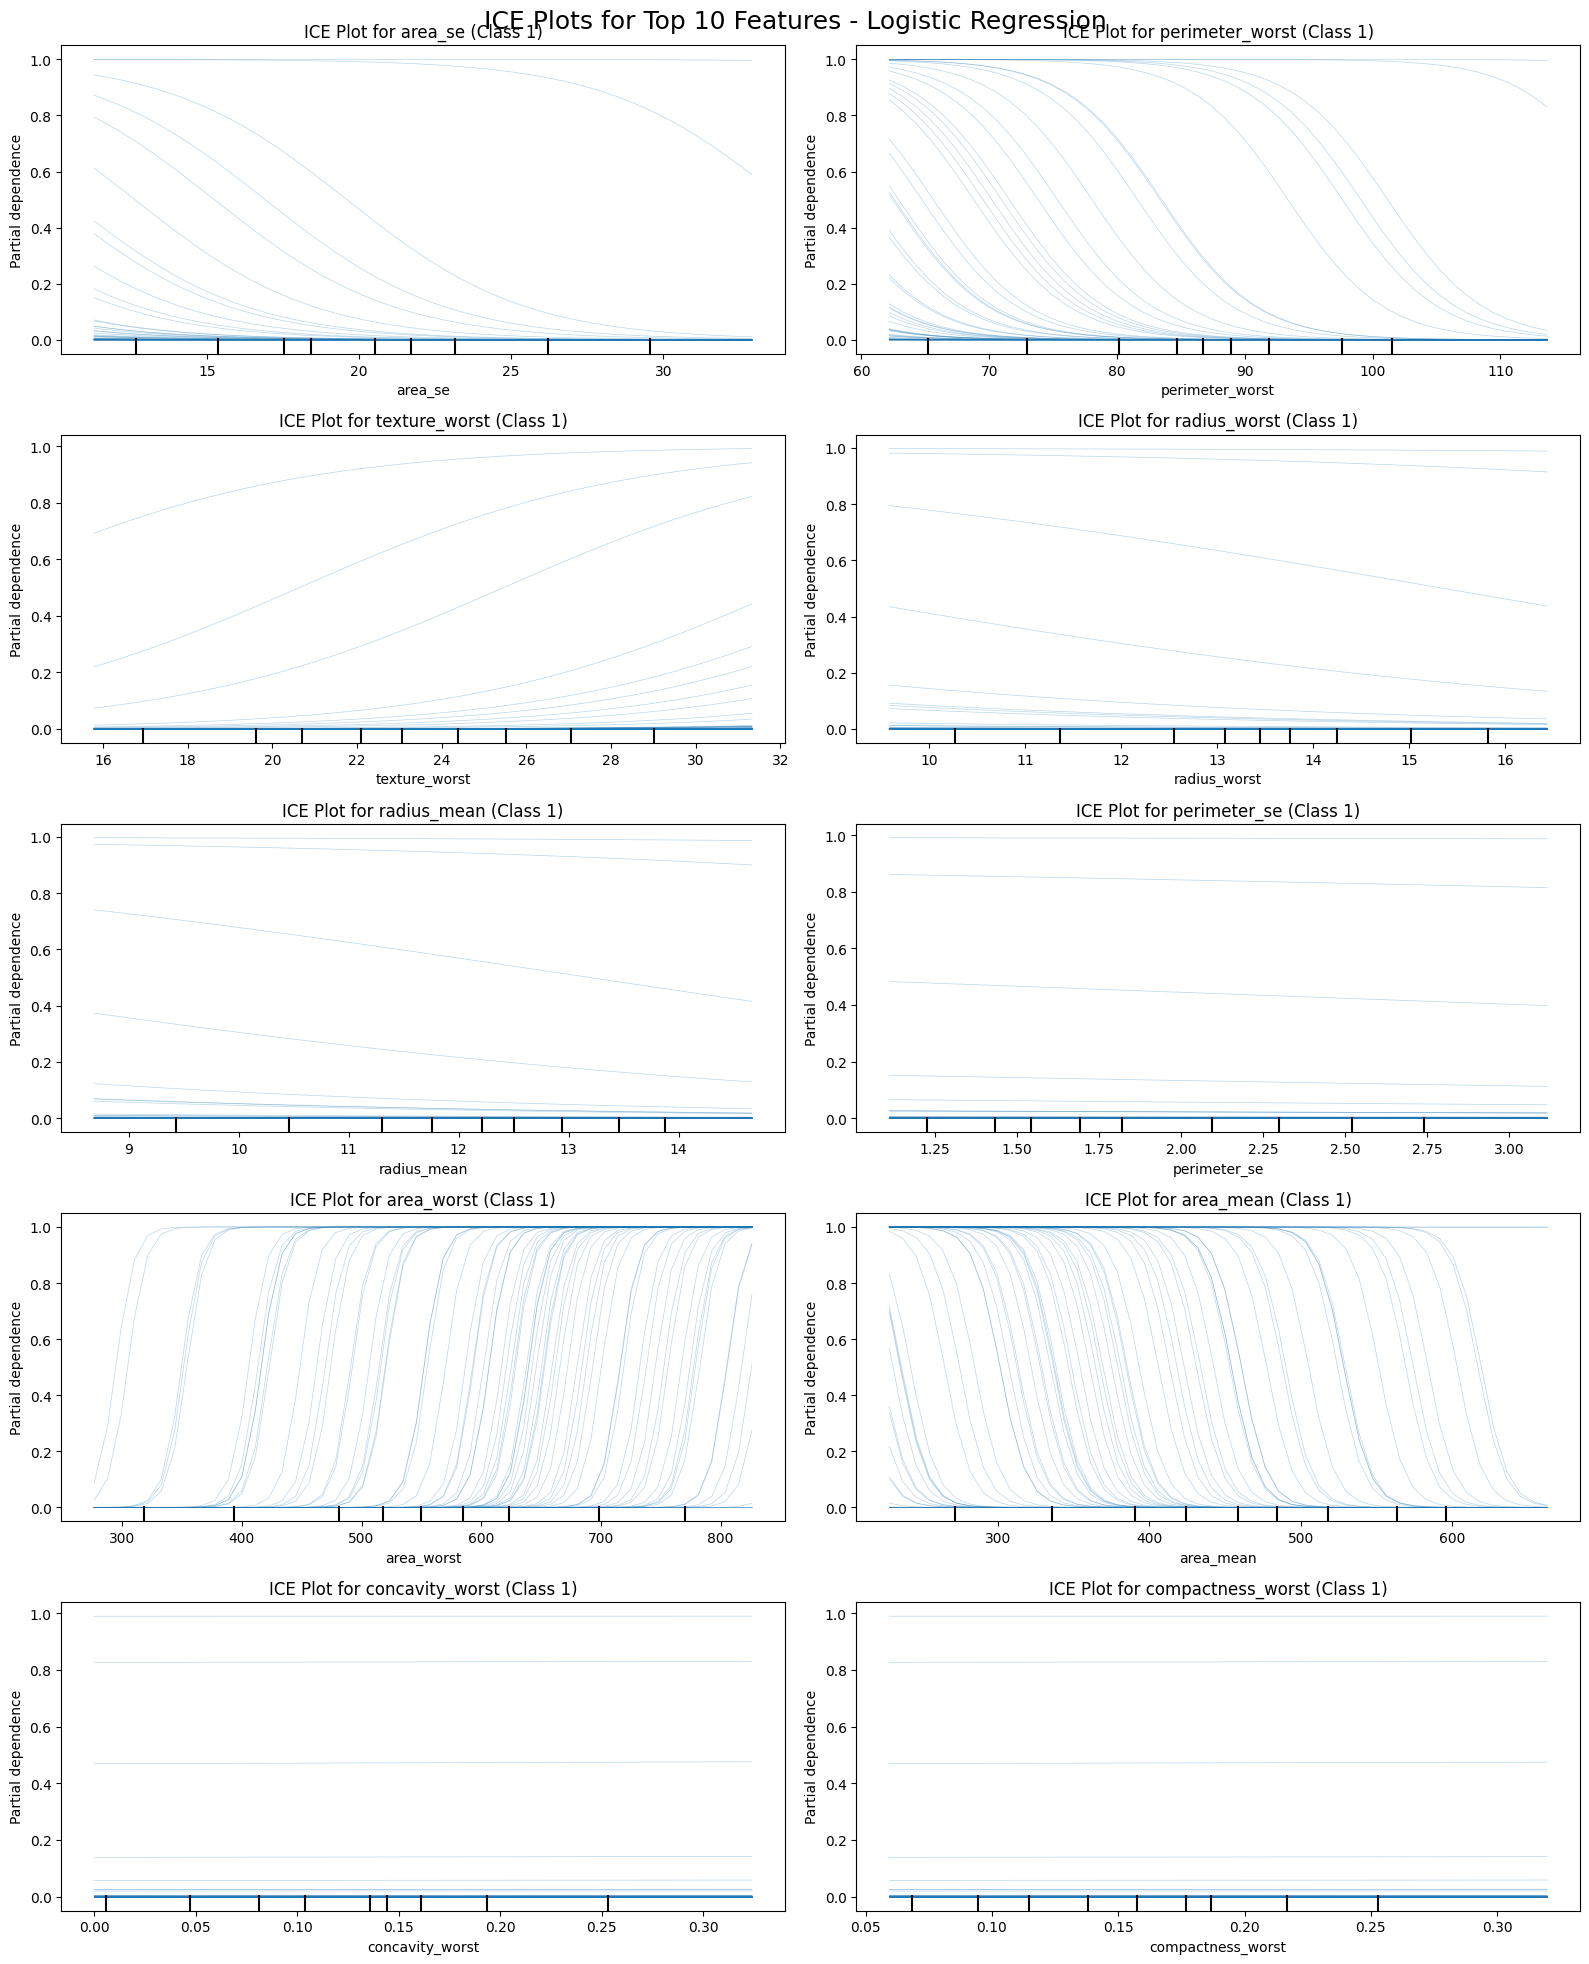

In [31]:
coefs = np.abs(lr_model.coef_[0])
top10_indices = np.argsort(coefs)[::-1][:10]
top10_features = [X.columns[i] for i in top10_indices]

fig, axes = plt.subplots(5, 2, figsize=(16, 20))

for idx, feature_name in enumerate(top10_features):
    row = idx // 2
    col = idx % 2
    feature_index = list(X.columns).index(feature_name)

    PartialDependenceDisplay.from_estimator(
        lr_model,
        X_test,
        features=[feature_index],
        feature_names=X.columns.tolist(),
        target=1,
        kind='individual',
        grid_resolution=50,
        ax=axes[row, col]
    )
    axes[row, col].set_title(f"ICE Plot for {feature_name} (Class 1)")
    axes[row, col].grid(True)

plt.suptitle("ICE Plots for Top 10 Features - Logistic Regression", fontsize=18)
plt.tight_layout()
plt.show()